<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/FakeNews_Classifications(Bidirectional_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d algord/fake-news

  0% 0.00/1.68M [00:00<?, ?B/s]
100% 1.68M/1.68M [00:00<00:00, 153MB/s]


In [4]:
import zipfile
zip = zipfile.ZipFile("/content/fake-news.zip",'r')
zip.extractall("/content")
zip.close()

In [44]:
df=pd.read_csv('FakeNewsNet.csv')

In [45]:
df.shape

(23196, 5)

In [46]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [47]:
df.tail()

,title,news_url,source_domain,tweet_num,real
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0
23195,Kelly Clarkson Performs a Medley of Kendrick L...,https://www.billboard.com/articles/news/bbma/8...,www.billboard.com,85,1


In [48]:
final_df=df[['title','real']]

In [49]:
final_df.head()

,title,real
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1


In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

##only once time
nltk.download('stopwords')

ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
corpus=[]
def text_cleaning(text):

  reviews = re.sub('[^a-zA-Z]', ' ', text)
  reviews=reviews.lower()
  reviews=reviews.split()
  reviews=[ps.stem(word) for word in reviews if word not in stopwords.words('english')]
  reviews=' '.join(reviews)
  corpus.append(reviews)

In [52]:
# Assuming final_df is your DataFrame
for title in final_df['title']:
    text_cleaning(title)

In [53]:
print(corpus[:10])

['kandi burruss explod rape accus real housew atlanta reunion video', 'peopl choic award best red carpet look', 'sophia bush send sweet birthday messag one tree hill co star hilari burton breyton eva', 'colombian singer maluma spark rumour inappropri relationship aunt', 'gossip girl year later upper east sider shock world chang pop cultur forev', 'gwen stefani got dump blake shelton jealousi drama exclus', 'broward counti sheriff fire lie parkland', 'amber rose shut french montana date rumor call rapper bruvaaa', 'mindi kale make first post babi appear disneyland wrinkl time co star', 'katharin mcphee butcher toni nomin drink']


In [54]:
y=final_df['real']

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
###importing the library which are required for evaluation the model (means evaluation metrics)
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [56]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [57]:
X=cv.fit_transform(corpus).toarray()

In [58]:
X.shape,y.shape

((23196, 5000), (23196,))

In [59]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
cv.get_feature_names_out()

array(['aaron', 'aaron carter', 'aaron rodger', ..., 'zolciak',
       'zolciak biermann', 'zone'], dtype=object)

In [61]:
count_df=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [62]:
count_df.head()

,aaron,aaron carter,aaron rodger,ab,abbey,abbi,abbi lee,abbi lee miller,abc,abc news,...,zayn malik,zendaya,zeta,zeta jone,zig,zoe,zoe saldana,zolciak,zolciak biermann,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Let's Implements the LSTM Model and Bidirectional LSTM**

In [64]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [65]:
##initilazition of voc. size
voc_size=5000

one_hot_rep=[one_hot(word, voc_size) for word in corpus]

In [68]:
one_hot_rep[:10]

[[4698, 1943, 971, 2501, 342, 4234, 4271, 2811, 4082, 2006],
 [4187, 1678, 2781, 1974, 2581, 4559, 3388],
 [1004,
  3128,
  3973,
  4961,
  154,
  3918,
  490,
  1818,
  2543,
  1601,
  2966,
  1570,
  2976,
  3527,
  3614],
 [1493, 3969, 3349, 4362, 4567, 4254, 1816, 4176],
 [3344, 3023, 1811, 566, 1645, 2341, 4112, 3118, 2782, 2229, 4899, 4919, 4065],
 [1326, 4869, 2326, 1364, 2194, 1978, 1295, 774, 354],
 [4405, 3101, 158, 1565, 3324, 1225],
 [3387, 815, 512, 843, 166, 3122, 4224, 2828, 92, 1778],
 [1995, 2235, 3869, 1534, 2184, 3459, 384, 3758, 1668, 3541, 1601, 2966],
 [3736, 1823, 4194, 1927, 1500, 713]]

In [73]:
sent_length=20
embedd_doc=pad_sequences(one_hot_rep,padding='pre',maxlen=sent_length)

In [80]:
print(embedd_doc,embedd_doc.shape)

[[   0    0    0 ... 2811 4082 2006]
 [   0    0    0 ... 2581 4559 3388]
 [   0    0    0 ... 2976 3527 3614]
 ...
 [   0    0    0 ... 1486 2019  434]
 [   0    0    0 ... 4880 1205  354]
 [   0    0    0 ... 1269 2821 2781]] (23196, 20)


In [92]:
##declaring the embedding features
embedding_vector_features=50

##model initilization
model=Sequential()

model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [93]:
##compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [94]:
X_final=embedd_doc
y_final=np.array(y)

In [95]:
print(X_final.shape,y_final.shape,type(y_final),type(X_final))

(23196, 20) (23196,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [96]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [97]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/10
243/243 [==============================] - 16s 56ms/step - loss: 0.4603 - accuracy: 0.7990 - val_loss: 0.4082 - val_accuracy: 0.8233
Epoch 2/10
243/243 [==============================] - 14s 56ms/step - loss: 0.3448 - accuracy: 0.8507 - val_loss: 0.4128 - val_accuracy: 0.8209
Epoch 3/10
243/243 [==============================] - 13s 56ms/step - loss: 0.3021 - accuracy: 0.8725 - val_loss: 0.4289 - val_accuracy: 0.8187
Epoch 4/10
243/243 [==============================] - 14s 59ms/step - loss: 0.2602 - accuracy: 0.8913 - val_loss: 0.4532 - val_accuracy: 0.8101
Epoch 5/10
243/243 [==============================] - 13s 53ms/step - loss: 0.2237 - accuracy: 0.9092 - val_loss: 0.5101 - val_accuracy: 0.7996
Epoch 6/10
243/243 [==============================] - 14s 57ms/step - loss: 0.1927 - accuracy: 0.9212 - val_loss: 0.5871 - val_accuracy: 0.7910
Epoch 7/10
243/243 [==============================] - 13s 56ms/step - loss: 0.1634 - accuracy: 0.9353 - val_loss: 0.6926 - val_accuracy:

In [91]:
## importing the  visualization library
import matplotlib.pyplot as plt

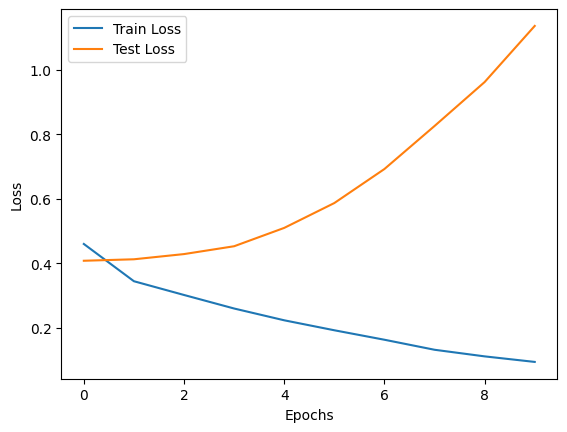

In [98]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Test Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

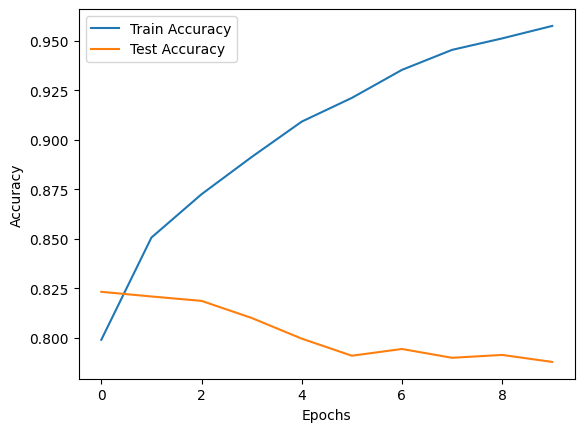

In [99]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [100]:
y_pred_lstm=model.predict(X_test)
len(y_pred_lstm)

240/240 [==============================] - 3s 8ms/step


7655

In [101]:
threshold = 0.5  # You can adjust this threshold based on your problem's needs

# Convert probabilities to binary labels
y_pred_binary = (y_pred_lstm >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7878510777269758


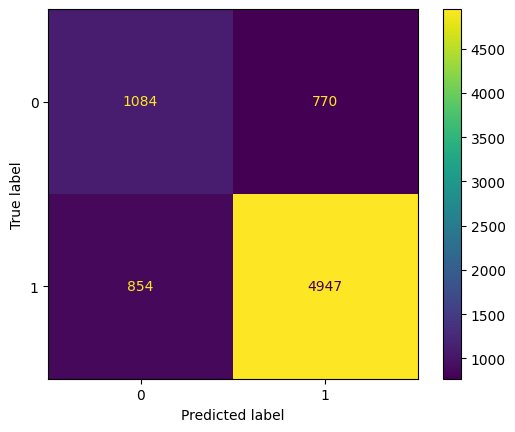

In [102]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary)).plot()

In [103]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1854
           1       0.87      0.85      0.86      5801

    accuracy                           0.79      7655
   macro avg       0.71      0.72      0.72      7655
weighted avg       0.79      0.79      0.79      7655



## Improving this model through Dropout or BatchNorm

In [110]:
##declaring the embedding features
embedding_vector_features=50

##model initilization
model1=Sequential()

model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model1.add(Dropout(0.9))
model1.add(LSTM(100))
model1.add(Dropout(0.9))

model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.6))

model1.add(Dense(1,activation='sigmoid'))

In [111]:
model1.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [112]:
history1=model1.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/10
243/243 [==============================] - 20s 68ms/step - loss: 0.5861 - accuracy: 0.7418 - val_loss: 0.5286 - val_accuracy: 0.7578
Epoch 2/10
243/243 [==============================] - 14s 59ms/step - loss: 0.5008 - accuracy: 0.7724 - val_loss: 0.4350 - val_accuracy: 0.8072
Epoch 3/10
243/243 [==============================] - 12s 51ms/step - loss: 0.4536 - accuracy: 0.8041 - val_loss: 0.4131 - val_accuracy: 0.8227
Epoch 4/10
243/243 [==============================] - 12s 51ms/step - loss: 0.4312 - accuracy: 0.8122 - val_loss: 0.4083 - val_accuracy: 0.8212
Epoch 5/10
243/243 [==============================] - 12s 51ms/step - loss: 0.4108 - accuracy: 0.8235 - val_loss: 0.4049 - val_accuracy: 0.8266
Epoch 6/10
243/243 [==============================] - 14s 57ms/step - loss: 0.4075 - accuracy: 0.8267 - val_loss: 0.4044 - val_accuracy: 0.8221
Epoch 7/10
243/243 [==============================] - 12s 51ms/step - loss: 0.3960 - accuracy: 0.8289 - val_loss: 0.4028 - val_accuracy:

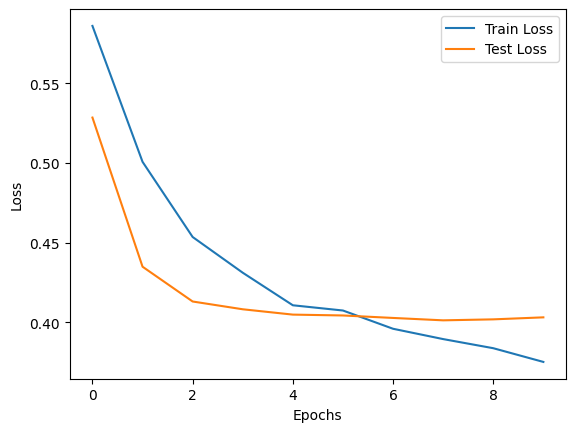

In [113]:
plt.plot(history1.history['loss'],label='Train Loss')
plt.plot(history1.history['val_loss'],label='Test Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

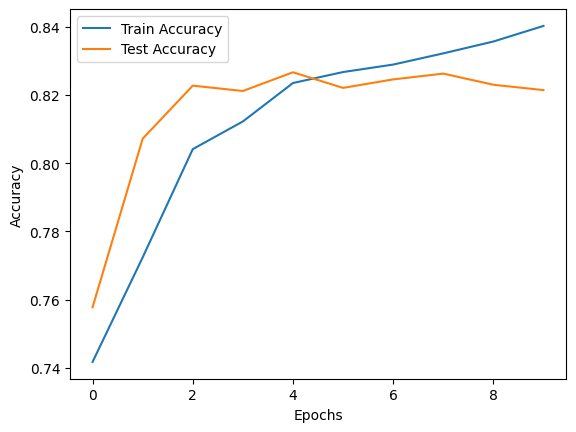

In [114]:
plt.plot(history1.history['accuracy'],label='Train Accuracy')
plt.plot(history1.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [115]:
y_pred_lstm1=model1.predict(X_test)

240/240 [==============================] - 2s 7ms/step


In [116]:
threshold=0.5

# Convert probabilities to binary labels
y_pred_binary1 = (y_pred_lstm1 >= threshold).astype(int)

In [121]:
print("Train Total Accuracy:- ",accuracy_score(y_test,y_pred_binary1))

Train Total Accuracy:-  0.8214239059438275


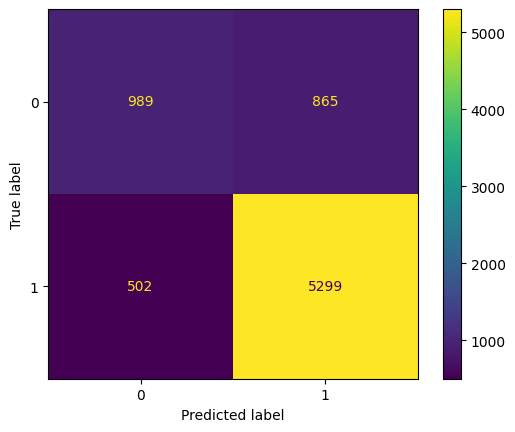

In [122]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary1)).plot()

In [123]:
print(classification_report(y_test,y_pred_binary1))

              precision    recall  f1-score   support

           0       0.66      0.53      0.59      1854
           1       0.86      0.91      0.89      5801

    accuracy                           0.82      7655
   macro avg       0.76      0.72      0.74      7655
weighted avg       0.81      0.82      0.81      7655



Now, Let's Implement the Bidirectional LSTM(RNNs)

In [129]:
##creating the embedding vectors features
embedding_vector_features=50

##init bidirectional model
model2=Sequential()

model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model2.add(Bidirectional(LSTM(100)))

model2.add(Dense(128,activation='relu'))

model2.add(Dense(1,activation='sigmoid'))

In [130]:
##let's compile the model
model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [131]:
##let's train the model
history2=model2.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/10
243/243 [==============================] - 30s 99ms/step - loss: 0.4602 - accuracy: 0.7967 - val_loss: 0.4095 - val_accuracy: 0.8261
Epoch 2/10
243/243 [==============================] - 22s 92ms/step - loss: 0.3459 - accuracy: 0.8536 - val_loss: 0.4063 - val_accuracy: 0.8214
Epoch 3/10
243/243 [==============================] - 24s 97ms/step - loss: 0.3048 - accuracy: 0.8736 - val_loss: 0.4468 - val_accuracy: 0.8046
Epoch 4/10
243/243 [==============================] - 21s 88ms/step - loss: 0.2653 - accuracy: 0.8922 - val_loss: 0.4547 - val_accuracy: 0.8101
Epoch 5/10
243/243 [==============================] - 22s 92ms/step - loss: 0.2308 - accuracy: 0.9061 - val_loss: 0.5138 - val_accuracy: 0.8065
Epoch 6/10
243/243 [==============================] - 24s 99ms/step - loss: 0.1992 - accuracy: 0.9225 - val_loss: 0.5624 - val_accuracy: 0.8063
Epoch 7/10
243/243 [==============================] - 24s 99ms/step - loss: 0.1762 - accuracy: 0.9328 - val_loss: 0.6027 - val_accuracy:

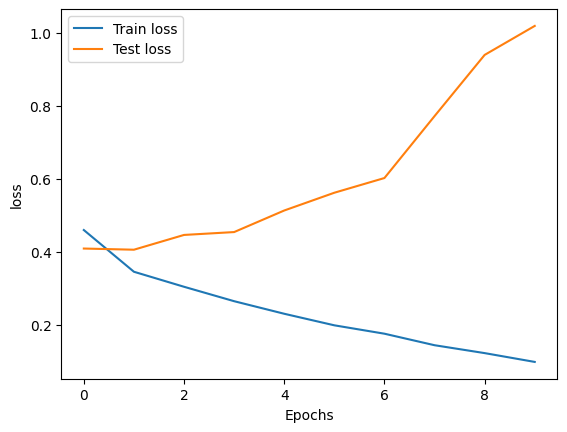

In [132]:
plt.plot(history2.history['loss'],label='Train loss')
plt.plot(history2.history['val_loss'],label='Test loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

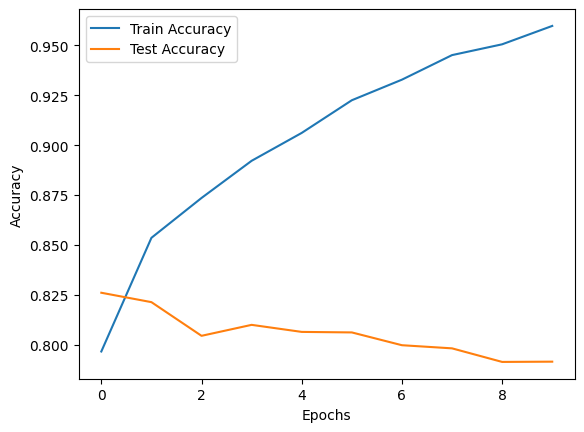

In [133]:
plt.plot(history2.history['accuracy'],label='Train Accuracy')
plt.plot(history2.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [150]:
y_pred_blstm=model2.predict(X_test)

240/240 [==============================] - 3s 10ms/step


In [151]:
threshold=0.5
y_pred_binary3=(y_pred_blstm >= threshold).astype(int)

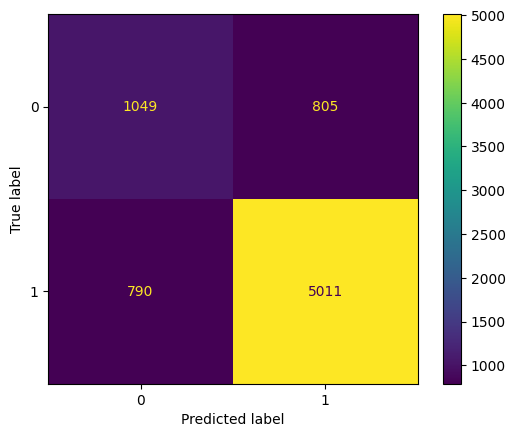

In [152]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_binary3)).plot()

In [153]:
print(classification_report(y_test,y_pred_binary3))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1854
           1       0.86      0.86      0.86      5801

    accuracy                           0.79      7655
   macro avg       0.72      0.71      0.72      7655
weighted avg       0.79      0.79      0.79      7655



**Now Let's tr with Dropout Reg**

In [157]:
##init the model
model3=Sequential()

##creatinig the model
model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model3.add(Dropout(0.9))
model3.add(Bidirectional(LSTM(100)))
model3.add(Dropout(0.9))

model3.add(Dense(128,activation='relu'))
model.add(Dropout(0.9))

model3.add(Dense(1,activation='sigmoid'))

In [158]:
##now compile the model
model3.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
##let's train the model
history3=model3.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/20
243/243 [==============================] - 41s 125ms/step - loss: 0.5628 - accuracy: 0.7492 - val_loss: 0.4780 - val_accuracy: 0.7872
Epoch 2/20
243/243 [==============================] - 22s 89ms/step - loss: 0.4634 - accuracy: 0.7990 - val_loss: 0.4291 - val_accuracy: 0.8174
Epoch 3/20
243/243 [==============================] - 19s 79ms/step - loss: 0.4302 - accuracy: 0.8149 - val_loss: 0.4135 - val_accuracy: 0.8221
Epoch 4/20
243/243 [==============================] - 22s 89ms/step - loss: 0.4113 - accuracy: 0.8229 - val_loss: 0.4076 - val_accuracy: 0.8222
Epoch 5/20
243/243 [==============================] - 20s 84ms/step - loss: 0.3992 - accuracy: 0.8303 - val_loss: 0.4061 - val_accuracy: 0.8270
Epoch 6/20
243/243 [==============================] - 21s 88ms/step - loss: 0.3874 - accuracy: 0.8309 - val_loss: 0.4014 - val_accuracy: 0.8239
Epoch 7/20
100/243 [===========>..................] - ETA: 10s - loss: 0.3724 - accuracy: 0.8389

In [ ]:
plt.plot(history3.history['loss'],label='Train loss')
plt.plot(history3.history['val_loss'],label='Test loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
plt.plot(history3.history['accuracy'],label='Train Accuracy')
plt.plot(history3.history['val_accuracy'],label='Test Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()